### Імпортування бібліотек

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

warnings.simplefilter('ignore')

### Зчитування та первинний аналіз датасету

In [39]:
ds = pd.read_csv('../data/variant_1.csv')

print('Columns count >> ', len(ds.columns), '\n')
print('Columns >> ', list(ds.columns))

Columns count >>  34 

Columns >>  ['Unnamed: 0', 'ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status']


In [41]:
ds.shape
key_column = ds['Status']
ds = ds.drop('Status', axis=1)

### Перевірка пропущених даних датасету

In [42]:
missing = []

for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

loan_limit 3344
approv_in_adv 908
loan_purpose 134
rate_of_interest 36439
Interest_rate_spread 36639
Upfront_charges 39642
term 41
Neg_ammortization 121
property_value 15098
income 9150
age 200
submission_of_application 200
LTV 15098


### Заміщення нумеричних даних на середні

In [43]:
def impute_na_with_median(df):
    medians = []
    numerical_columns = df.select_dtypes(include=['float64', 'int64'])
    if numerical_columns.empty:
        print("No numerical columns found in the DataFrame.")
        return
    for col in numerical_columns.columns:
        medians.append(df[col].median())
    for col, median_value in zip(numerical_columns.columns, medians):
        df[col].fillna(median_value, inplace=True)

impute_na_with_median(ds)


In [44]:
missing = []

for x in ds.select_dtypes(include=['float64', 'int64']).columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)
print(missing)

[]


### Перевірка відсутності даних у об'єктних колонок

In [45]:
from sklearn.preprocessing import OneHotEncoder

for x in ds.select_dtypes(include=['object']).columns:
    print('Data column ' + ds[x].name, ds[x].unique(), '\n')

Data column loan_limit ['cf' nan 'ncf'] 

Data column Gender ['Sex Not Available' 'Male' 'Joint' 'Female'] 

Data column approv_in_adv ['nopre' 'pre' nan] 

Data column loan_type ['type1' 'type2' 'type3'] 

Data column loan_purpose ['p1' 'p4' 'p3' 'p2' nan] 

Data column Credit_Worthiness ['l1' 'l2'] 

Data column open_credit ['nopc' 'opc'] 

Data column business_or_commercial ['nob/c' 'b/c'] 

Data column Neg_ammortization ['not_neg' 'neg_amm' nan] 

Data column interest_only ['not_int' 'int_only'] 

Data column lump_sum_payment ['not_lpsm' 'lpsm'] 

Data column construction_type ['sb' 'mh'] 

Data column occupancy_type ['pr' 'sr' 'ir'] 

Data column Secured_by ['home' 'land'] 

Data column total_units ['1U' '2U' '3U' '4U'] 

Data column credit_type ['EXP' 'EQUI' 'CRIF' 'CIB'] 

Data column co-applicant_credit_type ['CIB' 'EXP'] 

Data column age ['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25' nan] 

Data column submission_of_application ['to_inst' 'not_inst' nan] 

Data column R

In [46]:
for x in ds.select_dtypes(include='object'):
    print(pd.get_dummies(ds[x], drop_first=False, dtype=int))

        cf  ncf
0        1    0
1        1    0
2        1    0
3        1    0
4        1    0
...     ..  ...
148665   1    0
148666   1    0
148667   1    0
148668   1    0
148669   1    0

[148670 rows x 2 columns]
        Female  Joint  Male  Sex Not Available
0            0      0     0                  1
1            0      0     1                  0
2            0      0     1                  0
3            0      0     1                  0
4            0      1     0                  0
...        ...    ...   ...                ...
148665       0      0     0                  1
148666       0      0     1                  0
148667       0      0     1                  0
148668       1      0     0                  0
148669       1      0     0                  0

[148670 rows x 4 columns]
        nopre  pre
0           1    0
1           1    0
2           0    1
3           1    0
4           0    1
...       ...  ...
148665      1    0
148666      1    0
148667      1    0


### Заміщення об'єктних колонок

In [47]:

def encode_column(col_name, data): 
    encoder = OneHotEncoder(categories='auto', drop='first', handle_unknown='error')
    encoder.fit(data[[col_name]].fillna('Missing'))
    encoded_data = encoder.transform(data[[col_name]].fillna('Missing'))
    return encoded_data, encoder

for x in ds.select_dtypes(include=['object']): 
    col_name = ds[x].name
    encoded_data, encoder = encode_column(col_name, ds)
    ds.drop(columns=[col_name], inplace=True)
    new_col_names = encoder.get_feature_names_out([col_name])
    encoded_df = pd.DataFrame(encoded_data.toarray(), columns=new_col_names)
    ds = pd.concat([ds, encoded_df], axis=1)



In [48]:
ds['Status'] = key_column
print(ds.columns)

ds.to_csv('../data/variant_1_modified.csv')

Index(['Unnamed: 0', 'ID', 'year', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value',
       'income', 'Credit_Score', 'LTV', 'loan_limit_cf', 'loan_limit_ncf',
       'Gender_Joint', 'Gender_Male', 'Gender_Sex Not Available',
       'approv_in_adv_nopre', 'approv_in_adv_pre', 'loan_type_type2',
       'loan_type_type3', 'loan_purpose_p1', 'loan_purpose_p2',
       'loan_purpose_p3', 'loan_purpose_p4', 'Credit_Worthiness_l2',
       'open_credit_opc', 'business_or_commercial_nob/c',
       'Neg_ammortization_neg_amm', 'Neg_ammortization_not_neg',
       'interest_only_not_int', 'lump_sum_payment_not_lpsm',
       'construction_type_sb', 'occupancy_type_pr', 'occupancy_type_sr',
       'Secured_by_land', 'total_units_2U', 'total_units_3U', 'total_units_4U',
       'credit_type_CRIF', 'credit_type_EQUI', 'credit_type_EXP',
       'co-applicant_credit_type_EXP', 'age_35-44', 'age_45-54', 'age_55-64',
       'age_65-74', 'age_<25'

### Діагностика датасету

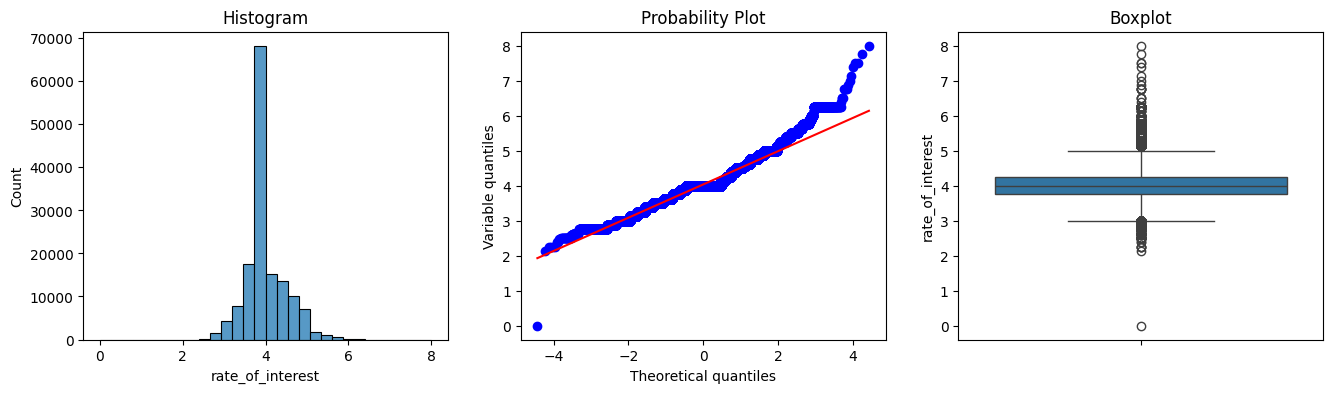

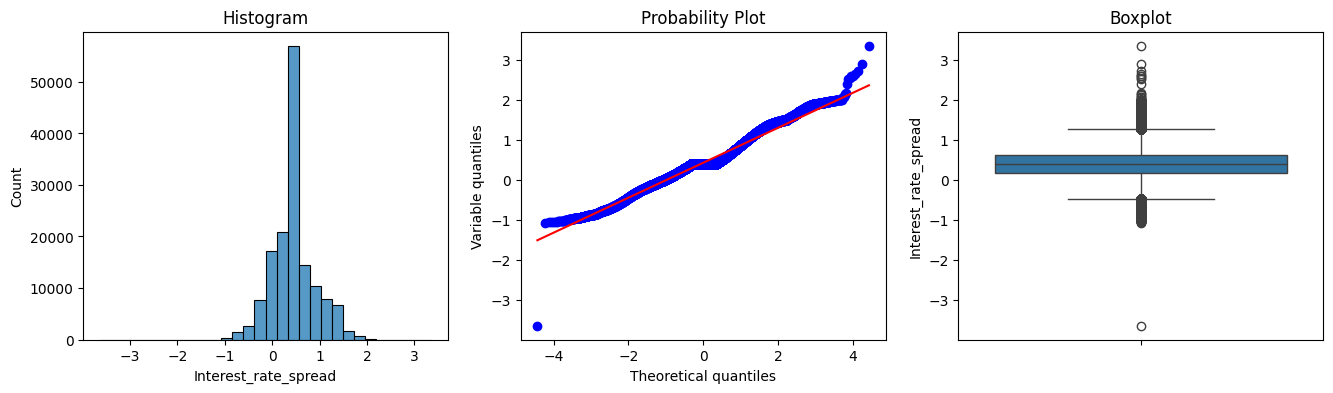

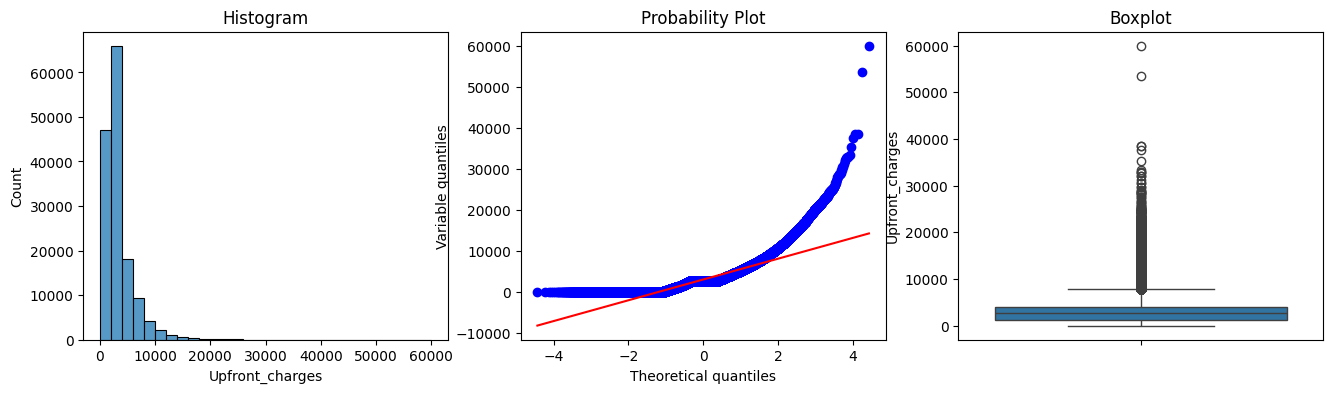

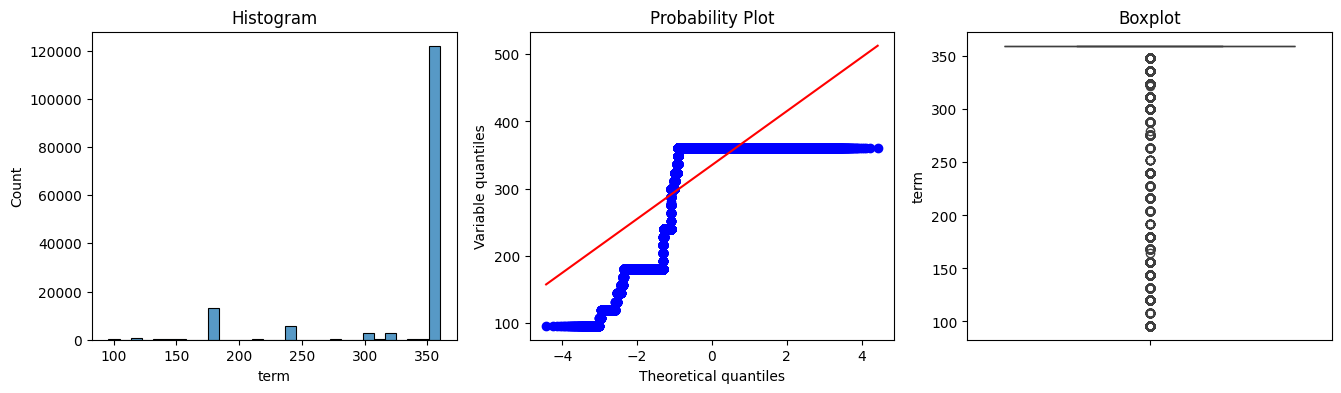

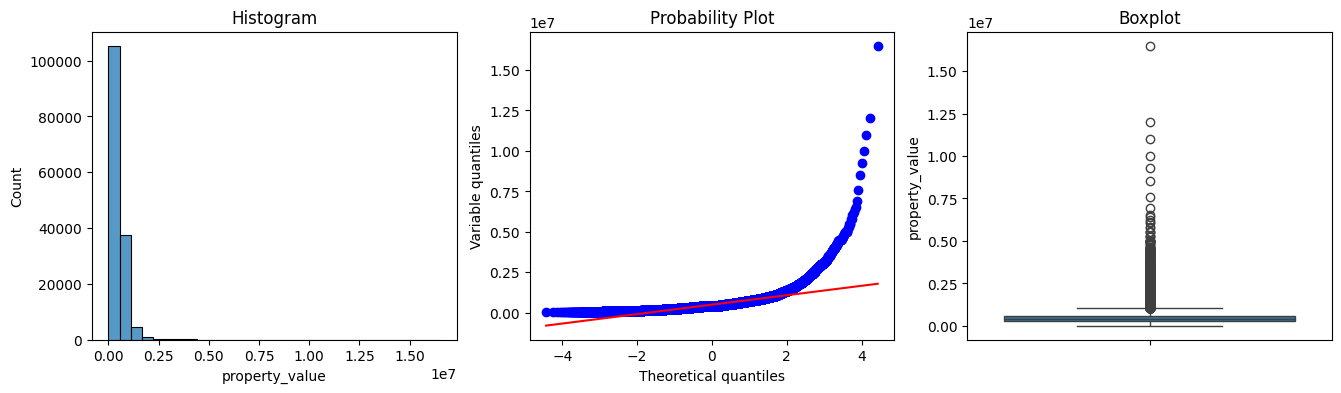

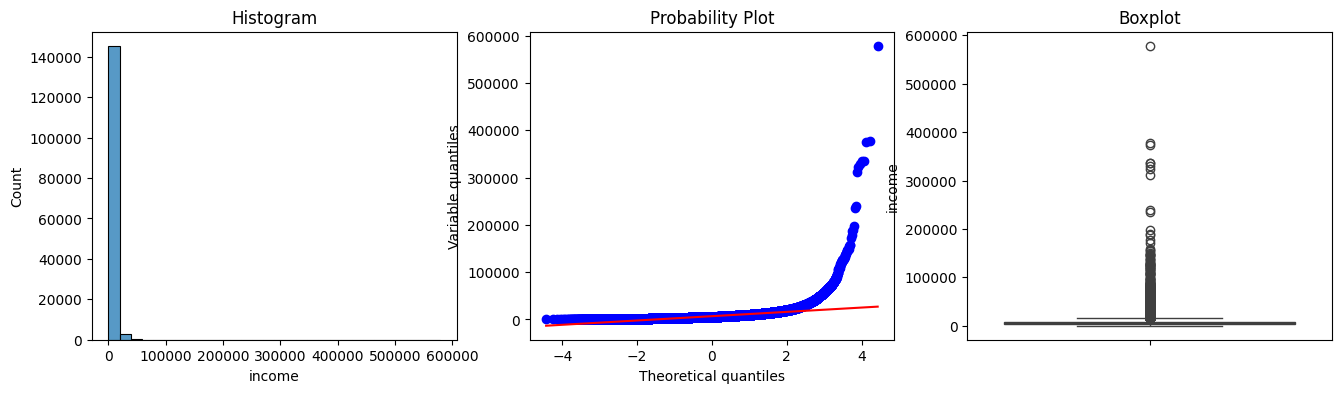

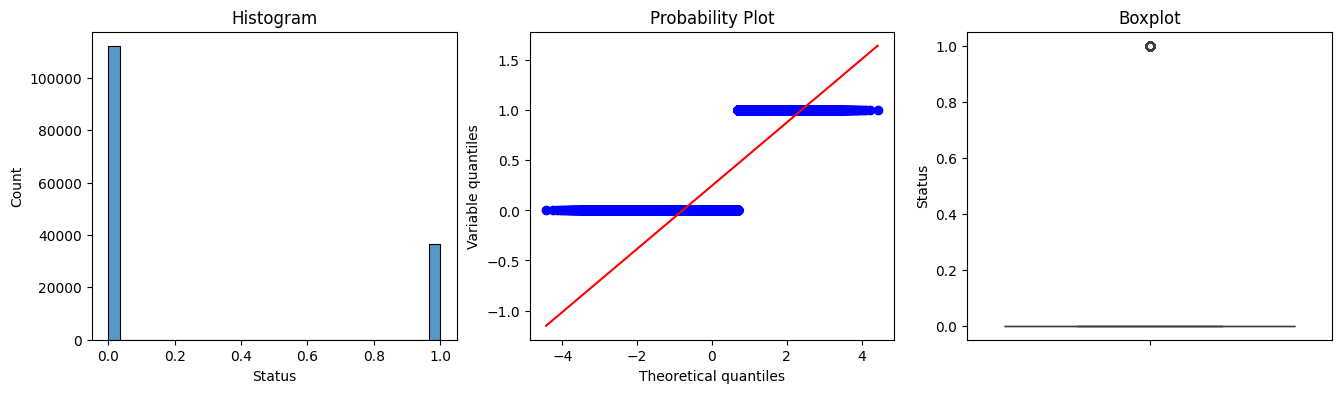

In [22]:

def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()
for x in ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Status']:
    diagnostic_plots(ds, x)